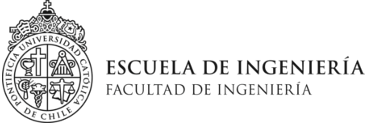

# **➼ Enrique Andres Rojas Alvarez**


In [ ]:
#########################################################################################################################################################################################################################################################################
#Librerias
#########################################################################################################################################################################################################################################################################
import numpy
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc,ndimage
import imageio
import scipy.misc
import cv2
import math
from scipy import signal
from scipy import misc
from scipy.signal.fir_filter_design import fft
from numpy.fft import fft2, ifft2, fftshift, ifftshift,  rfft2, irfft2
from numpy.fft import fft2, ifft2, fftshift, ifftshift
#########################################################################################################################################################################################################################################################################

**Color de las imagenes generadas**

In [ ]:
#si quiere cambiar el color

#color="cool"# otro color entretenido "PuRd" y los mas serios son : 'binary' y  'Greys'
color='binary'

## Codigo Preguna N°1

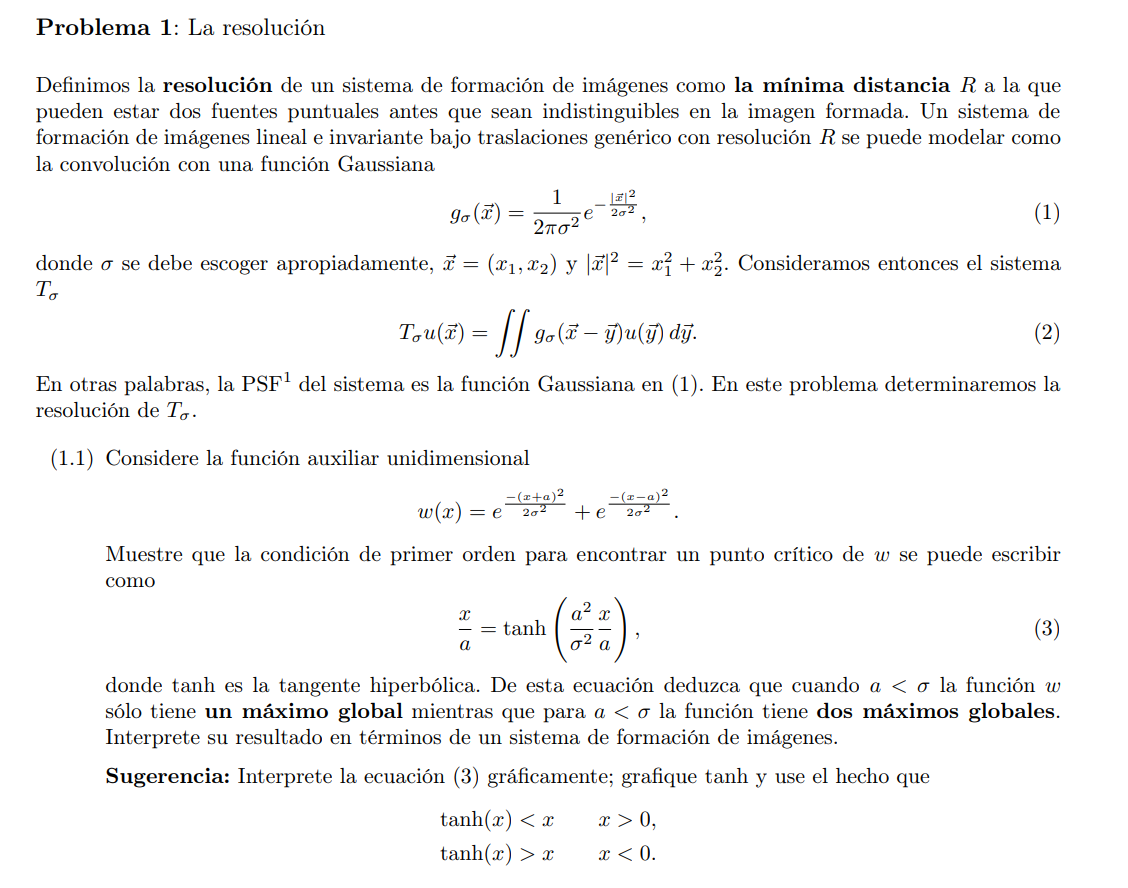 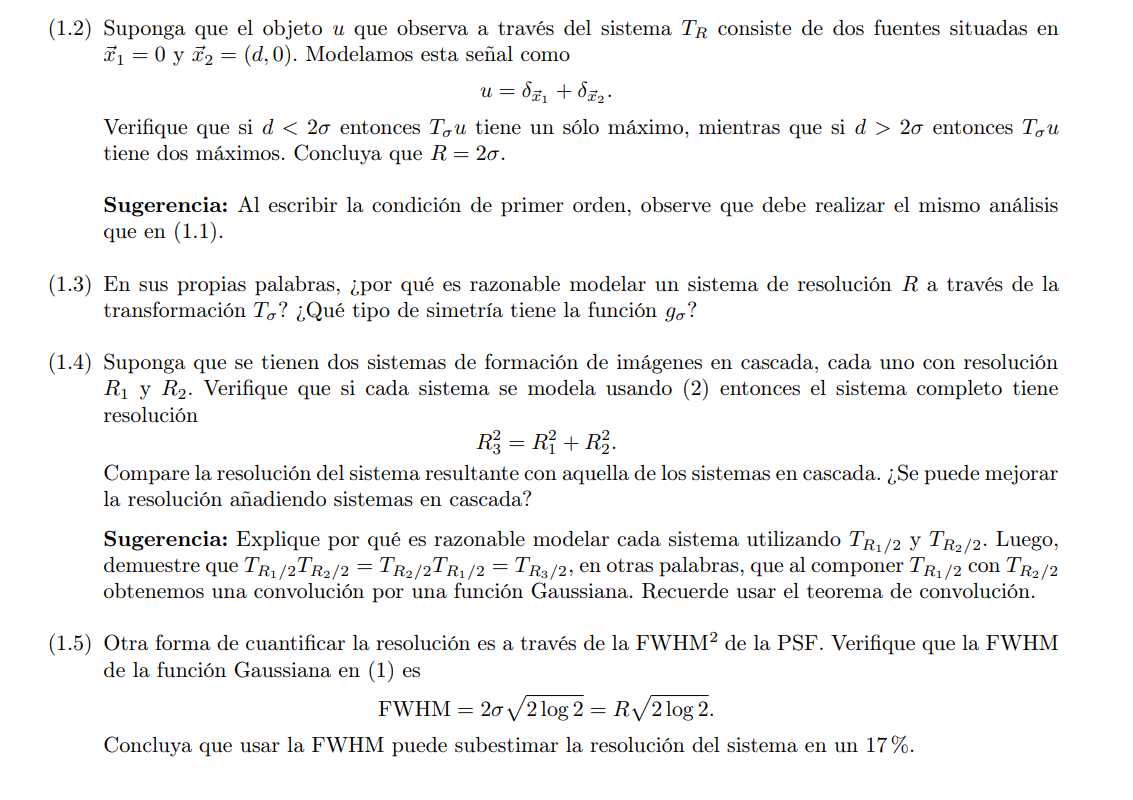

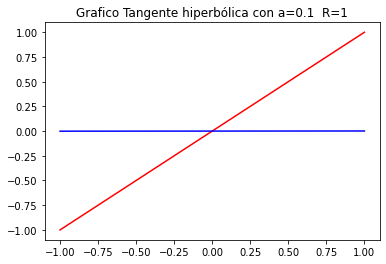

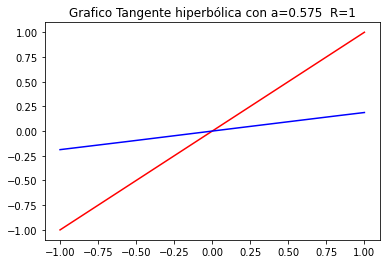

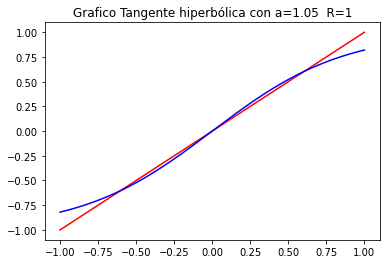

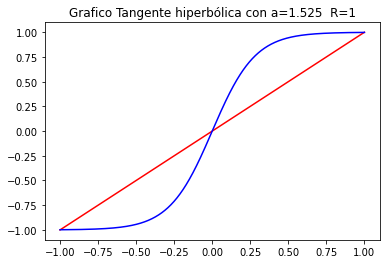

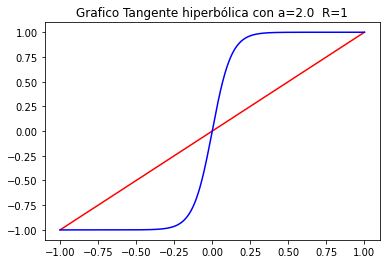

In [ ]:
x = np.linspace(-1,1, 1000)

a=np.linspace(0.1,2, 5)
o=1
for i in a:
  fn = np.tanh(x*i/o*i**2)

  fig, ax  = plt.subplots()
  plt.title(f"Grafico Tangente hiperbólica con a={i}  R=1")
  ax.plot(x, x,color="red")
  ax.plot(x,fn,color="blue")
  plt.show()


## Codigo Preguna N°2

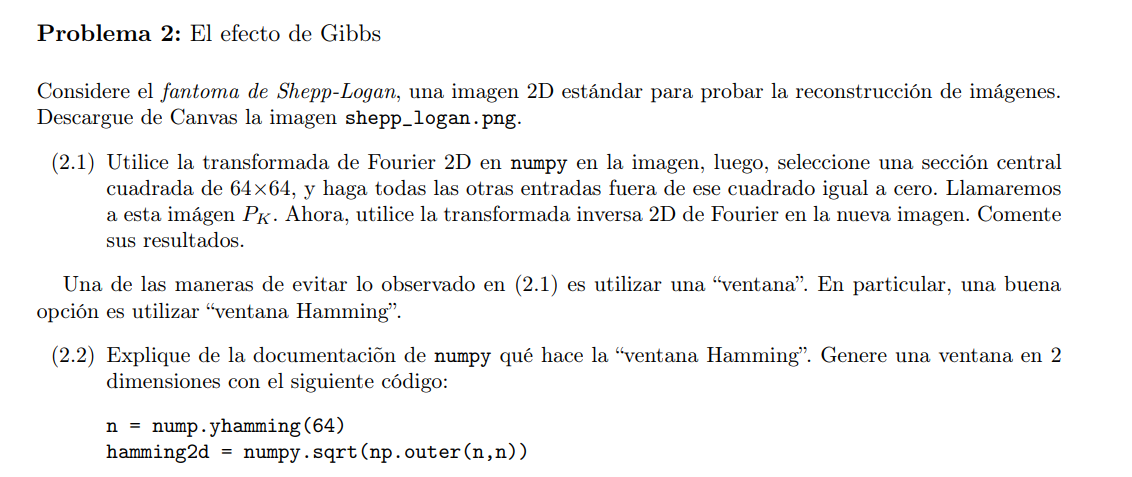 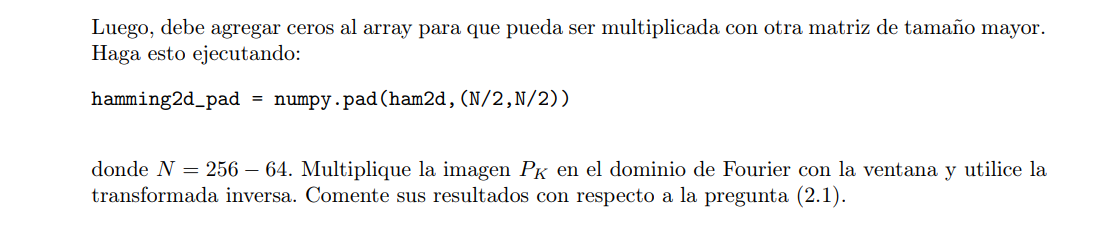

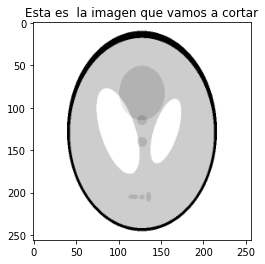

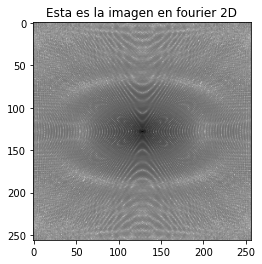

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


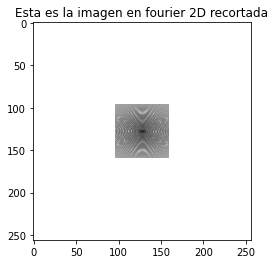

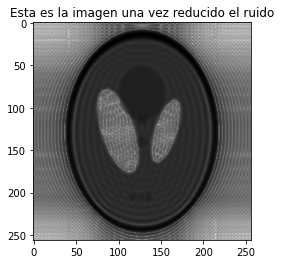

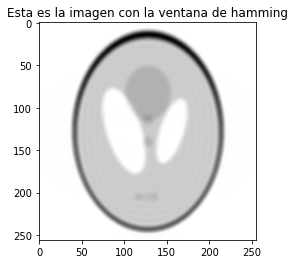

In [ ]:
#2.1
#########################################################################################################################################################################################################################################################################
img = imageio.imread('shepp_logan.png')
#########################################################################################################################################################################################################################################################################
imgGray = cv2.imread("shepp_logan.png",0) #le redusco la dimencion a la imagen
fig=plt.figure()

#########################################################################################################################################################################################################################################################################
#defino las transformadas de fourier 2D
from numpy.fft import fft2, ifft2, fftshift, ifftshift
def fftc(X):
    return fftshift(fft2(ifftshift(X)))
def ifftc(X):
    return fftshift(ifft2(ifftshift(X)))
#########################################################################################################################################################################################################################################################################
lx,ly=imgGray.shape
def c64(img):
  tamaño=64 #si se quiere cambiar la dimencion del cuadrado alterar este numero, recordar que no puede ser mayor a el tamaño de la imagen
  a=abs(tamaño/2+lx/2-1)
  b=abs(tamaño/2-lx/2)
  c64= img.copy()
  for x in range(lx):
    for y in range(ly):
      if x<b or y<b or x>a or y>a:
        c64[x][y]=0

  return c64

#########################################################################################################################################################################################################################################################################
plt.title("Esta es  la imagen que vamos a cortar")
plt.imshow(imgGray,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
imgGray_fftc=fftc(imgGray)
plt.title("Esta es la imagen en fourier 2D")
plt.imshow(np.log10(abs(imgGray_fftc)),cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
c64_fftc=c64(imgGray_fftc) #esta es la imagen Pk
plt.title("Esta es la imagen en fourier 2D recortada")
plt.imshow(np.log10(abs(c64_fftc)),cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
c64_ifftc=ifftc(c64_fftc)
plt.title("Esta es la imagen una vez reducido el ruido")
plt.imshow(np.log10(abs(c64_ifftc)),cmap="gist_yarg")
plt.show()
#########################################################################################################################################################################################################################################################################
#la diferencia de color se debe unicamente  a como funciona matplotlib, pero lo mas importante es que la imagen perdio ruido por ende mejoro su calidad
#########################################################################################################################################################################################################################################################################
#2.2
#########################################################################################################################################################################################################################################################################
n = np.hamming(64)
hamming2d = np.sqrt(np.outer(n,n))
hamming2d_pad = numpy.pad(hamming2d,(96,96))
fftc_H=c64_fftc*hamming2d_pad
imgGrayH=ifftc(fftc_H)
plt.title("Esta es la imagen con la ventana de hamming")
plt.imshow(abs(imgGrayH),cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
#como podemos apreciar al aplicar la ventana de hamming se reduce considerablemente el ruido, y si lo comparamos con el metetodo anterior podemos evidenciar que mediante este metodo se logra una reduccion mas efectiva, dado a que se forman trasos mas marcados que en el caso anterior

## Codigo Preguna N°3

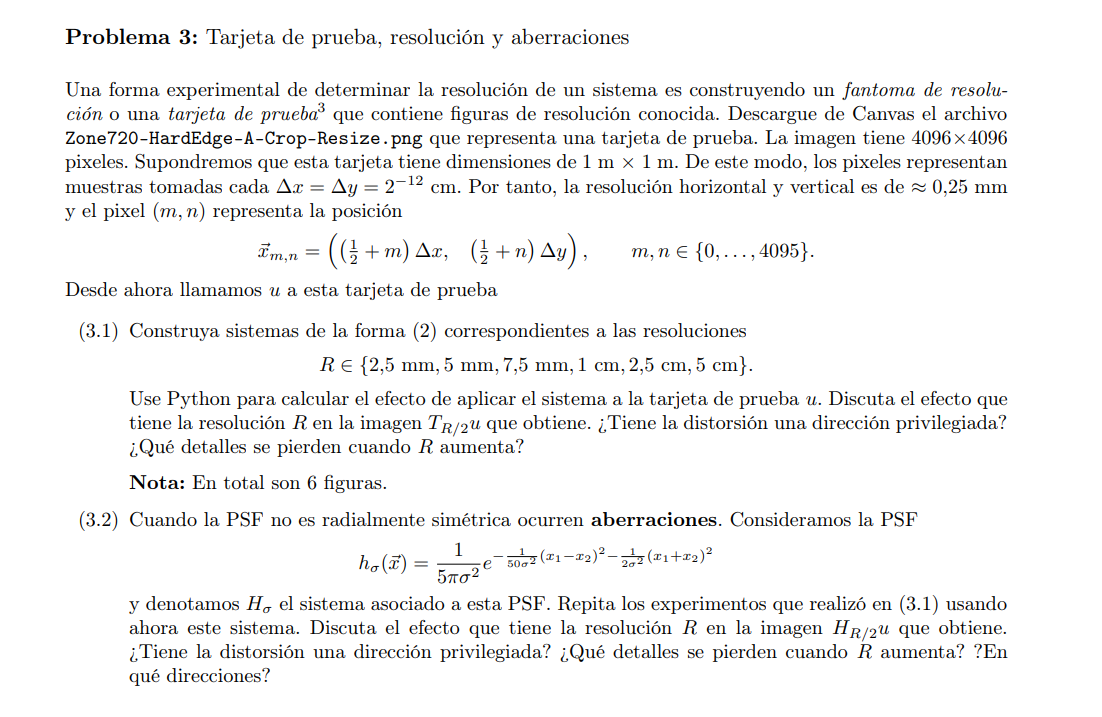

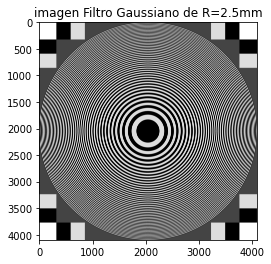

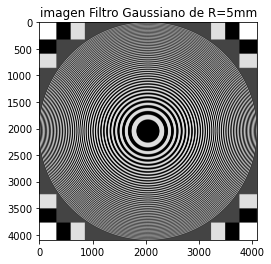

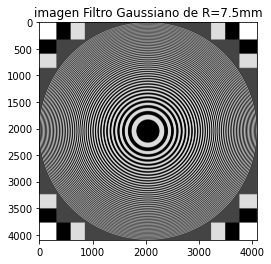

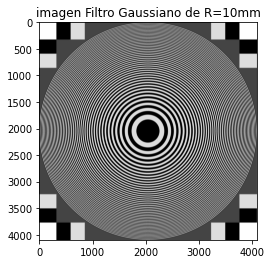

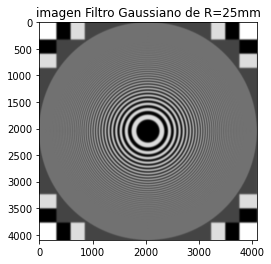

In [ ]:

#3.1
#########################################################################################################################################################################################################################################################################
tarj = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
Dx=Dy=2**(-12)
#########################################################################################################################################################################################################################################################################
def pos(m,n):
  pos=((0.5+m)*Dx,(0.5+n)*Dy)
  return pos
#########################################################################################################################################################################################################################################################################
tarj1 = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)

#########################################################################################################################################################################################################################################################################
from numpy.fft import fft2, ifft2, fftshift, ifftshift
def fftc(X):
    return fftshift(fft2(ifftshift(X)))
def ifftc(X):
    return fftshift(ifft2(ifftshift(X)))
#########################################################################################################################################################################################################################################################################
lx,ly = tarj.shape

FX=[2.5,5,7.5,10,25,50]
#########################################################################################################################################################################################################################################################################
for f in FX:
  blur_G = ndimage.gaussian_filter(tarj,sigma= (f)/2)
  plt.title(f"imagen Filtro Gaussiano de R={f}mm")
  plt.imshow(blur_G,cmap=color)
  plt.show()
#########################################################################################################################################################################################################################################################################
#3.2
#########################################################################################################################################################################################################################################################################


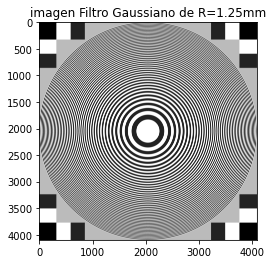

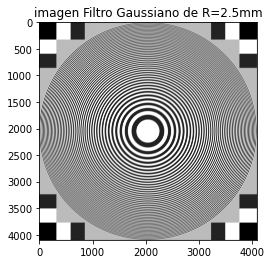

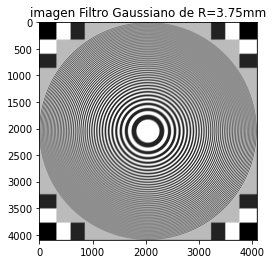

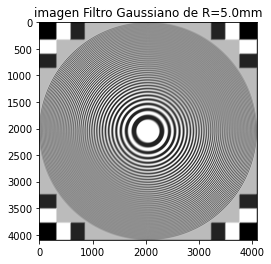

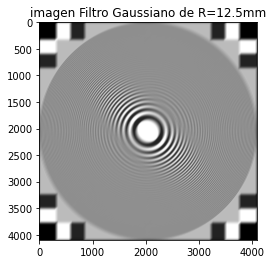

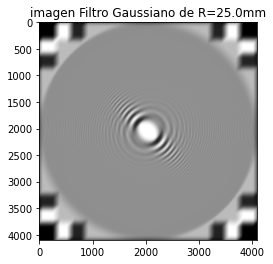

In [ ]:
tarj = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)

he, wi = tarj.shape

resolutions = [2.5/2, 5/2, 7.5/2, 10/2, 25/2, 50/2]
y = np.arange(-(he+1)/2, (he-1)/2)
x = np.arange(-(wi+1)/2, (wi-1)/2)

xx, yy = np.meshgrid(x, y, sparse=True)

def get_filters(S=10):
    resX = np.ceil(R*np.sqrt(-2*np.log(0.01))).astype(int)
    resY = np.ceil(R*np.sqrt(-8*np.log(0.01))).astype(int)
    h = 1/(5*np.pi*S**2)*np.exp(-(1/(50*S**2))*(xx-yy)**2-(1/(2*S**2))*(xx+yy)**2)[he//2-resY:he//2+resY, wi//2-resX:wi//2+resX]
    return h

def DFT_convolve(img, spatial_kernel):

    w, h = img.shape
    fw, fh = spatial_kernel.shape

    P = 2**np.ceil(np.log2(w + fw - 1)).astype(int)
    Q = 2**np.ceil(np.log2(h + fh - 1)).astype(int)

    img_freq = rfft2(np.pad(img, ((0, P-w),(0,Q-h)), "constant"))

    padding = (( 0, P - fw), ( 0, Q - fh))
    H = rfft2(np.pad(spatial_kernel, padding, "constant"))

    return np.real(irfft2(img_freq*H))[fw//2:w+fw//2,fh//2:h+fh//2]

Atest_h = []


resolutions = [2.5/2, 5/2, 7.5/2, 10/2, 25/2, 50/2]
for R in resolutions:
    h = get_filters(R)
    test_h = DFT_convolve(tarj, h)

    Atest_h.append(test_h)

for i in  range(len(Atest_h)):

  plt.imshow(Atest_h[i], cmap='gray')
  plt.title(f"imagen Filtro Gaussiano de R={resolutions[i]}mm")
  plt.show()



## Codigo Preguna N°4

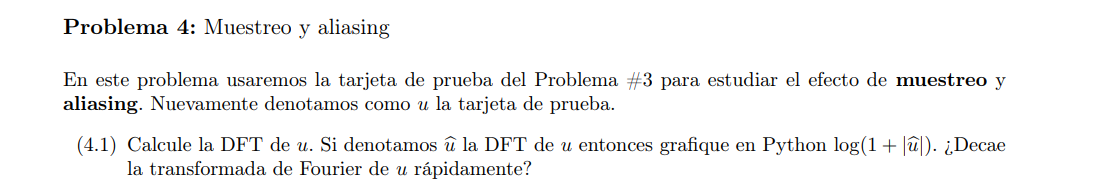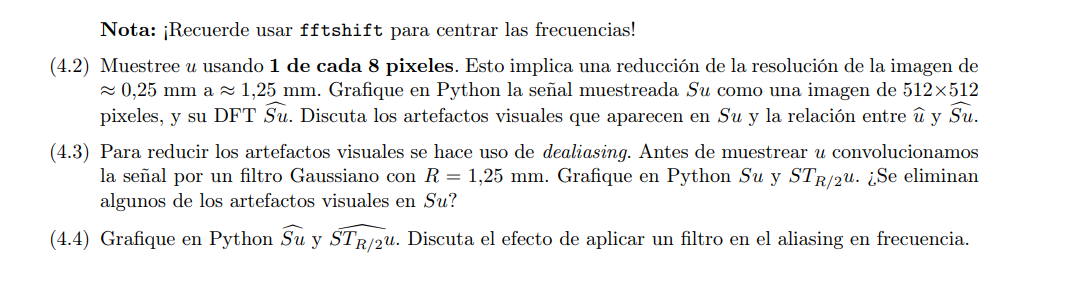

NameError: ignored

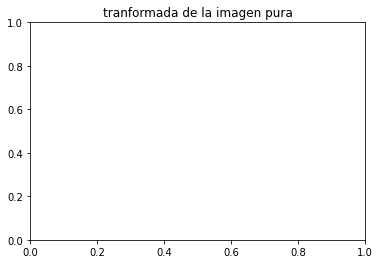

In [ ]:
#########################################################################################################################################################################################################################################################################
#4.1
#########################################################################################################################################################################################################################################################################
def fftc(X):
    return fftshift(fft2(ifftshift(X)))
def ifftc(X):
    return fftshift(ifft2(ifftshift(X)))
#########################################################################################################################################################################################################################################################################
tarj = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
u=fftc(tarj)
grafico=np.log10(1+abs(u))
plt.title("tranformada de la imagen pura")
plt.imshow(grafico,color)
plt.show()
#########################################################################################################################################################################################################################################################################
#4.2
#########################################################################################################################################################################################################################################################################
lx,ly = tarj.shape
f=8
tarj2 = np.zeros((lx//f, ly//f), dtype=int)
for i in range(0, lx, f):
    for j in range(0, ly, f):
        try:
            tarj2[i//f][j//f] = tarj[i][j]
        except IndexError:
            pass
#########################################################################################################################################################################################################################################################################
plt.title("Imagen muestreada")
plt.imshow(tarj2, cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
w=fftc(tarj2)
grafico2=np.log10(1+abs(w))
plt.title("trasnformada de la imagen muestreada")
plt.imshow(grafico2,color)
plt.show()
#########################################################################################################################################################################################################################################################################
#4.3
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
blur_G = ndimage.gaussian_filter(img,sigma=1.25/2)
plt.title("imagen Filtro Gaussiano")
plt.imshow(blur_G,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
n=fftc(blur_G)
grafico3=np.log10(1+abs(n))
plt.title("Trasnformada de la imagen Filtro Gaussiano")
plt.imshow(grafico3,color)
plt.show()
#########################################################################################################################################################################################################################################################################
#4.4
#########################################################################################################################################################################################################################################################################
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
blur_G2 = ndimage.gaussian_filter(tarj2,sigma=1.25/2)
plt.title("Tras.Imagen muestreada y con Filtro Gaussiano")
plt.imshow(blur_G2,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
#4.5
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
blur_G2 = ndimage.gaussian_filter(tarj2,sigma=1.25/2)
plt.title("Tras.Imagen muestreada y con Filtro Gaussiano")
a=fftc(blur_G2 )
plt.imshow(a,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
blur_G2 = ndimage.gaussian_filter(tarj2,sigma=1.25/2)
plt.title("Tras.Imagen muestreada y con Filtro Gaussiano")
plt.show()
#########################################################################################################################################################################################################################################################################
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
plt.title("imagen original")
plt.imshow(img,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
#4.5
img = cv2.imread("Zone720-HardEdge-A-Crop-Resize.png",0)
plt.title("imagen original")
plt.imshow(img,cmap=color)
plt.show()
#########################################################################################################################################################################################################################################################################
